# Classification Using Joint Probability

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
mini_iris = np.round(iris.data[:, :2]).astype(int)
data = pd.DataFrame(mini_iris, columns = ['length', 'width'])
data['type'] = iris.target

In [3]:
# shuffle data
data = data.sample(frac = 1, random_state = 0)
data

,length,width,type
114,6,3,2
62,6,2,1
33,6,4,0
107,7,3,2
7,5,3,0
...,...,...,...
9,5,3,0
103,6,3,2
67,6,3,1
117,8,4,2


### 1. Decision Tree

In [4]:
import matplotlib.pyplot as plt
import numpy as np

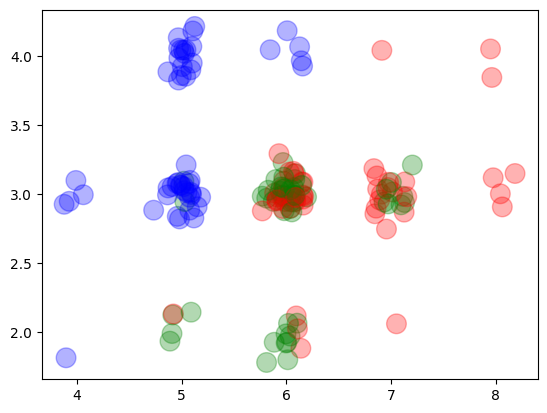

In [5]:
np.random.seed = 10
data_with_noise = data.iloc[:, :2] + np.random.normal(loc = 0, scale = 0.1, size = (150, 2), )
plt.scatter(data_with_noise.length, data_with_noise.width, c = ["bgr"[k] for k in data.iloc[:,2]], s = 200, alpha = 0.3)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
X_train, X_test = data[:120], data[120:]

y_train = X_train['type']
y_test = X_test['type']

X_train = X_train.drop('type', axis = 1)
X_test = X_test.drop('type', axis = 1)

In [8]:
classifier = DecisionTreeClassifier(max_depth = 4)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [9]:
classifier.predict(X_test)

array([0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 1,
       1, 0, 0, 0, 1, 1, 2, 0])

In [10]:
classifier.score(X_test, y_test)

0.8

### 2. Probabilistic Model

In [11]:
X_train, X_test = data[:120], data[120:]

In [12]:
# computing the joint probability distribution over the training data
joint_prob = X_train.groupby(['length', 'width', 'type']).size() / 120
joint_prob = joint_prob.reset_index(name = 'count')
joint_prob

,length,width,type,count
0,4,2,0,0.008333
1,4,3,0,0.033333
2,5,2,1,0.033333
3,5,2,2,0.008333
4,5,3,0,0.141667
5,5,3,1,0.016667
6,5,4,0,0.125000
7,6,2,1,0.050000
8,6,2,2,0.025000
9,6,3,1,0.175000


In [13]:
p_full = pd.DataFrame(data = [(l, w, t, s) for l in [4, 5, 6, 7, 8] for w in [2, 3, 4] for t in [0, 1, 2] for s in [0.000001]],
                      columns = ['length', 'width', 'type', 'count'])
joint_prob = pd.concat([joint_prob, p_full], axis = 0)
joint_prob = joint_prob.drop_duplicates(subset = ['length', 'width', 'type'], keep = 'first')
print(joint_prob.sample(10))
print("Cardinality: {}".format(p_full.shape[0]))

    length  width  type     count
26       6      4     2  0.000001
33       7      4     0  0.000001
4        5      3     0  0.141667
3        5      2     2  0.008333
27       7      2     0  0.000001
38       8      2     2  0.000001
14       5      3     2  0.000001
25       6      4     1  0.000001
9        5      2     0  0.000001
1        4      2     1  0.000001
Cardinality: 45


In [14]:
X_test_features = X_test.iloc[:, :2].values
X_test_actual_results = X_test.iloc[:, 2].values

In [15]:
predicted_values = []

for i in range(X_test_features.shape[0]):
    mask = (joint_prob.length.isin([X_test_features[i][0]])) & \
           (joint_prob.width.isin([X_test_features[i][1]]))
    predicted_values.append(joint_prob[mask].sort_values(['type'])['count'].argmax())

In [16]:
predicted_values = np.array(predicted_values)
predicted_values

array([0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 1,
       1, 0, 0, 0, 1, 1, 2, 0], dtype=int64)

In [17]:
predicted_values == X_test_actual_results

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True])

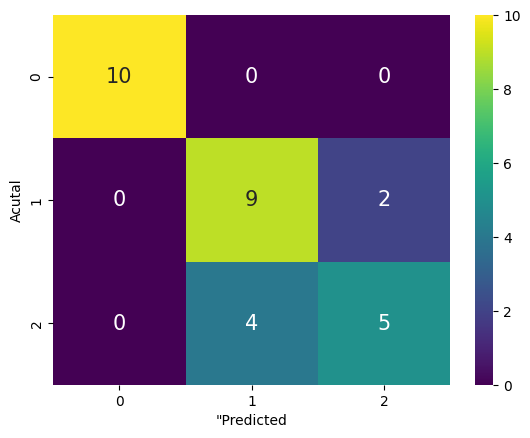

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(X_test_actual_results, predicted_values),
            cmap = 'viridis',
            annot = True,
            annot_kws = {'fontsize':15})
plt.xlabel('"Predicted')
plt.ylabel('Acutal')
plt.show()

In [19]:
score = (predicted_values == X_test_actual_results).sum() / 30
print(score)

0.8
